In [40]:
import requests
import json

import pandas as pd

auth_data = {
    "grant_type"    : "client_credentials",
    "client_id"     : "93c09f2e3a6e4150b50334f2ead49ab2",
    "client_secret" : "796002fd7ad95eaafac28c0669afd0274df67a60ad5cc09db4dd813c0c88c56a",
    "scope"         : "read_product_data"
}

# create session instance
session = requests.Session()

auth_request = session.post("https://idfs.gs.com/as/token.oauth2", data = auth_data)
access_token_dict = json.loads(auth_request.text)
access_token = "0012NkJpYOmEGZmibnTl8qH6ubI4"

# update session headers with access token
session.headers.update({"Authorization":"Bearer "+ access_token})

request_url = "https://api.marquee.gs.com/v1/data/USCANFPP_MINI/query"

request_query = {
                    "where": {
                        "gsid": "226278"
                    },
                    "startDate": "2012-01-01",
               }

request = session.post(url=request_url, json=request_query)
results = json.loads(request.text)




In [41]:
results = json.loads(request.text)
results = pd.DataFrame(results)
print(results)
results["date"] = results["data"]
results["gsid"] = results["data"]
results["financialReturnsScore"] = results["data"]
results["growthScore"] = results["data"]
results["multipleScore"] = results["data"]
results["integratedScore"] = results["data"]
results["updateTime"] = results["data"]
counter = 0
for result in results["data"]:
    results["date"][counter] = result.get('date')
    results["gsid"][counter] = result.get('gsid')
    results["financialReturnsScore"][counter] = result.get('financialReturnsScore')
    results["growthScore"][counter] = result.get('growthScore')
    results["multipleScore"][counter] = result.get('multipleScore')
    results["integratedScore"][counter] = result.get('integratedScore')
    results["updateTime"][counter] = result.get('updateTime')
    counter += 1

results = results.drop('data', 1)
results

    

             requestId                                               data
0     9fce2e7a-1139895  {'date': '2012-12-12', 'gsid': '226278', 'fina...
1     9fce2e7a-1139895  {'date': '2012-12-13', 'gsid': '226278', 'fina...
2     9fce2e7a-1139895  {'date': '2012-12-14', 'gsid': '226278', 'fina...
3     9fce2e7a-1139895  {'date': '2012-12-17', 'gsid': '226278', 'fina...
4     9fce2e7a-1139895  {'date': '2012-12-18', 'gsid': '226278', 'fina...
...                ...                                                ...
1183  9fce2e7a-1139895  {'date': '2017-06-26', 'gsid': '226278', 'fina...
1184  9fce2e7a-1139895  {'date': '2017-06-27', 'gsid': '226278', 'fina...
1185  9fce2e7a-1139895  {'date': '2017-06-28', 'gsid': '226278', 'fina...
1186  9fce2e7a-1139895  {'date': '2017-06-29', 'gsid': '226278', 'fina...
1187  9fce2e7a-1139895  {'date': '2017-06-30', 'gsid': '226278', 'fina...

[1188 rows x 2 columns]


,requestId,date,gsid,financialReturnsScore,growthScore,multipleScore,integratedScore,updateTime
0,9fce2e7a-1139895,2012-12-12,226278,0.956,0.914,0.906,0.654,2017-05-11T19:47:36Z
1,9fce2e7a-1139895,2012-12-13,226278,0.956,0.916,0.902,0.656,2017-05-11T19:47:36Z
2,9fce2e7a-1139895,2012-12-14,226278,0.954,0.918,0.902,0.656,2017-05-11T19:47:36Z
3,9fce2e7a-1139895,2012-12-17,226278,0.954,0.918,0.904,0.656,2017-05-11T19:47:36Z
4,9fce2e7a-1139895,2012-12-18,226278,0.954,0.916,0.906,0.654,2017-05-11T19:47:36Z
...,...,...,...,...,...,...,...,...
1183,9fce2e7a-1139895,2017-06-26,226278,0.966,0.038,0.084,0.64,2017-06-26T08:05:04Z
1184,9fce2e7a-1139895,2017-06-27,226278,0.966,0.038,0.086,0.64,2017-06-27T08:06:17Z
1185,9fce2e7a-1139895,2017-06-28,226278,0.966,0.038,0.086,0.64,2017-06-28T08:04:52Z
1186,9fce2e7a-1139895,2017-06-29,226278,0.966,0.038,0.086,0.64,2017-06-29T08:05:26Z


In [30]:
print(results["financialReturnsScore"].max())

0.996


In [31]:
#given an input of an array of gsid and a period of time.. start and end points , produce visual image for each of the features 


#Recommendation for which stock is the best based off of certain weight factors - default equal weights 
#given an input of weights [out of 1] for each of the score,
 #a. rank the stocks 
 #b. data visualization on the percent change    


#move to streamlit 


In [32]:
result = pd.DataFrame(results)
result.head()


,requestId,date,gsid,financialReturnsScore,growthScore,multipleScore,integratedScore,updateTime
0,d18c7071-1121532,2012-07-02,75154,0.178,0.656,0.402,0.478,2017-05-11T19:47:36Z
1,d18c7071-1121532,2012-07-03,75154,0.178,0.658,0.4,0.478,2017-05-11T19:47:36Z
2,d18c7071-1121532,2012-07-04,75154,0.176,0.658,0.392,0.48,2017-05-11T19:47:36Z
3,d18c7071-1121532,2012-07-05,75154,0.178,0.66,0.396,0.48,2017-05-11T19:47:36Z
4,d18c7071-1121532,2012-07-06,75154,0.176,0.66,0.394,0.48,2017-05-11T19:47:36Z


Input Company's ID: 53613,905632
Enter date in the format y-m-d 2013-10-09
input financial return weight starting from range 0-100 30
input growth weight starting from range 0-100 20


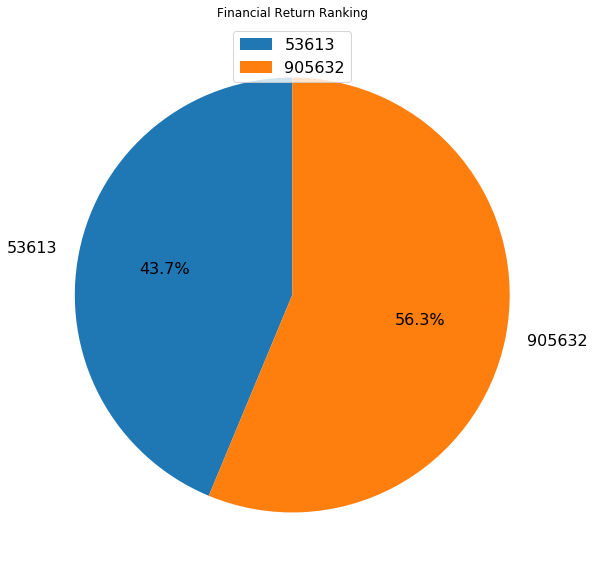

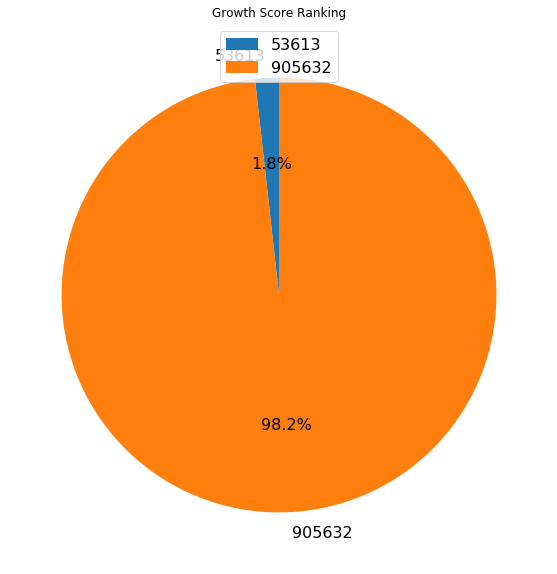

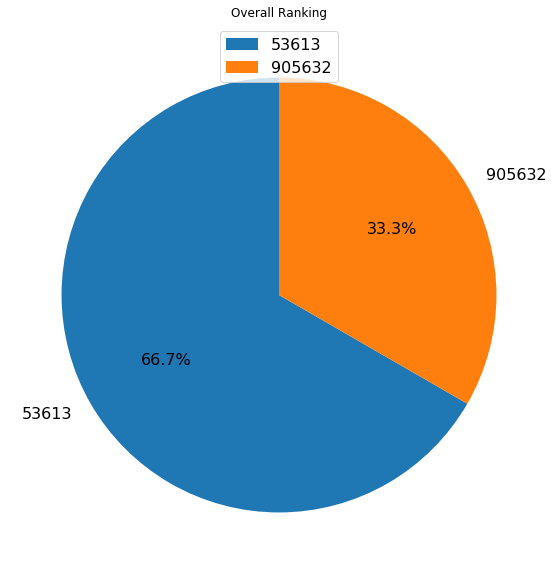

In [33]:
from datetime import datetime
import matplotlib.pyplot as plt


def unix_stamp(date):
    return  datetime.strptime(date,"%Y-%m-%d")

def financialReturnandGrowthScore():
  #Allow users to input list of company id and the date 
  inputCompanyID  = list(input("Input Company's ID: ").split(","))
  date = unix_stamp(input('Enter date in the format y-m-d ' ))

  #Weight values
  financialReturnWeight = int(input("input financial return weight starting from range 0-100 "))
  growthWeight  = int(input("input growth weight starting from range 0-100 "))

  companyID = results['gsid']
  
  companies = []
  for i in range(len(companyID)):
    if companyID[i] in inputCompanyID and date == unix_stamp(results['date'][i]):
      #CompanyDic[companyID[i]] = [results['financialReturnsScore'][i]*financialReturnWeight,results['growthScore'][i]*growthWeight]
      companyID[i] = {
          "name": companyID[i],
          "Date": date,
          "WeightedFinancialReturn": results['financialReturnsScore'][i]*financialReturnWeight,
          "WeightedGrowthScore": results['growthScore'][i]*growthWeight
      }
      companies.append(companyID[i])
  data = pd.DataFrame(companies)
  return data

def percentageChange():
  data = financialReturnandGrowthScore()
  data['FinancialReturn%Change'] = (data['WeightedFinancialReturn'] / data['WeightedFinancialReturn'].sum()) * 100
  data['GrowthScore%Change'] = (data['WeightedGrowthScore'] / data['WeightedGrowthScore'].sum()) * 100
  data['Ranks'] = (data['WeightedGrowthScore'] + data['WeightedFinancialReturn']).rank(ascending = 0) 
  data.head(10)
  return data

def visualize():
  data = percentageChange()
  #Financial Return plot
  _, ax = plt.subplots(figsize = (10,10))
  wedges,_,_ = ax.pie(data['FinancialReturn%Change']
                      ,labels=data["name"]
                      ,shadow=False,startangle=90, autopct="%1.1f%%"
                      ,textprops={'fontsize': 16})
  ax.legend(wedges,data["name"], loc="upper center", prop={'size': 16});
  ax.set_title("Financial Return Ranking")

  #Growth score plot
  _, ax = plt.subplots(figsize = (10,10))
  wedges,_,_ = ax.pie(data['GrowthScore%Change']
                      ,labels=data["name"]
                      ,shadow=False,startangle=90, autopct="%1.1f%%"
                      ,textprops={'fontsize': 16})
  ax.legend(wedges,data["name"], loc="upper center", prop={'size': 16});
  ax.set_title("Growth Score Ranking")

  # Overall ranking
  _, ax = plt.subplots(figsize = (10,10))
  wedges,_,_ = ax.pie(data['Ranks']
                      ,labels=data["name"]
                      ,shadow=False,startangle=90, autopct="%1.1f%%"
                      ,textprops={'fontsize': 16})
  ax.legend(wedges,data["name"], loc="upper center", prop={'size': 16});
  ax.set_title("Overall Ranking")


  
finalResult = visualize()